In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Reading data

In [2]:
df_bank_marketing = pd.read_csv("bank-additional-full.csv",sep=";")

# 1.Understanding Data

In [3]:
df_bank_marketing.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_bank_marketing.shape

(41188, 21)

In [5]:
df_bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df_bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As described in the 'bank-additional-names.txt' file, we can categorize input variables into 3 different types:

1)Bank client data  

2)Related with the last contact of the current campaign

3)Other attributes

# 1.1 Understanding Numeric Variables

In [7]:
numeric_variables=df_bank_marketing.select_dtypes(include = np.number)
numeric_variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


We can see that we have 10 numeric columns.

# 1.2 Understanding Categorical Variables

In [8]:
#Here, we exclude target variable
categoric_variables=df_bank_marketing.iloc[:,:-1].select_dtypes(exclude= np.number)
categoric_variables

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


# 1.3 Comprehensive Data Analysis

For more comprehensive analysis, we will use predefined function named 'MissingUniqueStatistics'.
It is constructed in one of the lectures.

In [9]:
"""

Description:
-----------

Algorithm print out comprises missing ratios and unique values of each column i a given dataframe


R&D:
---

Add '#_infinity_' column to the dataframe

"""

def MissingUniqueStatistics(df):
  
    import io
    import pandas as pd
    import psutil, os, gc, time
    import seaborn as sns
    from IPython.display import display, HTML
    # pd.set_option('display.max_colwidth', -1)
    from io import BytesIO
    import base64

    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    mean_list=[]
    std_list=[]
    min_list=[]
    Q1_list=[]
    Q2_list=[]
    Q3_list=[]
    max_list=[]

    df_statistics = df.describe().copy()

    for col in df.columns:
        variable_name_list.append(col)
        total_entry_list.append(df.loc[:,col].shape[0])
        data_type_list.append(df.loc[:,col].dtype)
        unique_values_list.append(list(df.loc[:,col].unique()))
        number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
        missing_value_number_list.append(df.loc[:,col].isna().sum())
        missing_value_ratio_list.append(round((100*df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

        try:
            mean_list.append(df_statistics.loc[:,col][1])
            std_list.append(df_statistics.loc[:,col][2])
            min_list.append(df_statistics.loc[:,col][3])
            Q1_list.append(df_statistics.loc[:,col][4])
            Q2_list.append(df_statistics.loc[:,col][5])
            Q3_list.append(df_statistics.loc[:,col][6])
            max_list.append(df_statistics.loc[:,col][7])
        except:
            mean_list.append('NaN')
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    data_info_df = pd.DataFrame({'Variable': variable_name_list, 
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list, 
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

    data_info_df = data_info_df.set_index("Variable", inplace=False)

    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [10]:
data_info= MissingUniqueStatistics(df_bank_marketing)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0020259221394856772 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
age,41188,0,0.0,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78,40.0241,10.4212,17,32,38,47,98
campaign,41188,0,0.0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...",42,2.56759,2.77001,1,1,2,3,56
nr.employed,41188,0,0.0,float64,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076....",11,5167.04,72.2515,4963.6,5099.1,5191,5228.1,5228.1
euribor3m,41188,0,0.0,float64,"[4.857, 4.856, 4.855, 4.859, 4.86, 4.858000000...",316,3.62129,1.73445,0.634,1.344,4.857,4.961,5.045
cons.conf.idx,41188,0,0.0,float64,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...",26,-40.5026,4.6282,-50.8,-42.7,-41.8,-36.4,-26.9
cons.price.idx,41188,0,0.0,float64,"[93.994, 94.465, 93.91799999999999, 93.444, 93...",26,93.5757,0.57884,92.201,93.075,93.749,93.994,94.767
emp.var.rate,41188,0,0.0,float64,"[1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0,...",10,0.0818855,1.57096,-3.4,-1.8,1.1,1.4,1.4
poutcome,41188,0,0.0,object,"[nonexistent, failure, success]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,41188,0,0.0,int64,"[0, 1, 2, 3, 4, 5, 6, 7]",8,0.172963,0.494901,0,0,0,0,7


Here, we see 0 missing values because they are defined as another category named 'unknown'. For further missing value analysis, we will define it as Na.

In [11]:
df_bank_marketing2=df_bank_marketing.replace({'unknown':np.nan})

In [12]:
df_bank_marketing2.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Now we can apply the function again!

In [13]:
data_info= MissingUniqueStatistics(df_bank_marketing2)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0018711050351460775 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
default,41188,8597,20.8726,object,"[no, nan, yes]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,1731,4.2027,object,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,990,2.4036,object,"[no, yes, nan]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,990,2.4036,object,"[no, yes, nan]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,41188,330,0.8012,object,"[housemaid, services, admin., blue-collar, tec...",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,80,0.1942,object,"[married, single, divorced, nan]",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,41188,0,0.0000,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78,40.0241,10.4212,17,32,38,47,98
poutcome,41188,0,0.0000,object,"[nonexistent, failure, success]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nr.employed,41188,0,0.0000,float64,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076....",11,5167.04,72.2515,4963.6,5099.1,5191,5228.1,5228.1


# 2. Exploratory Data Analysis 

In this part, we will analyze 'Bank Client data' which is constitued of 7 variables:
    1 - age
    2 - job : type of job 
    3 - marital : marital status
    4 - education 
    5 - default: has credit in default?
    6 - housing: has housing loan? 
    7 - loan: has personal loan?

## Correlation Heatmap

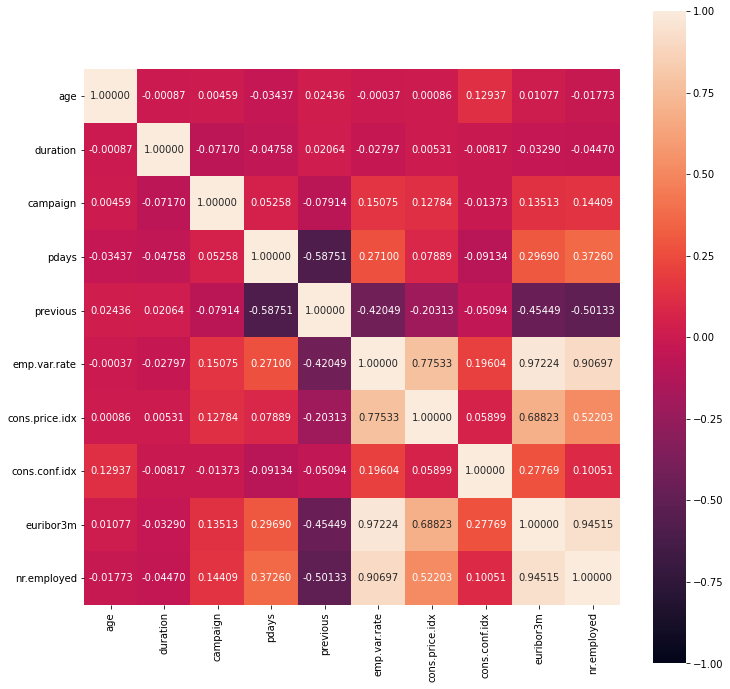

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df_bank_marketing2.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.5f')
plt.show()

From the heatmap, we can observe that nr.employed(number of employees), emp.var.rate(employment variation rate) and euribor3m(euribor 3 month rate) are significantly correlated pairwisely, all three of which are the social and economic context attributes.

# 2.1. Understanding Numerical Variables

In [15]:
df_bank_marketing

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2.1.1 Age

<AxesSubplot:xlabel='age'>

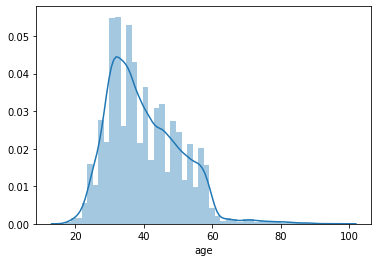

In [16]:
sns.distplot(df_bank_marketing.age)

<AxesSubplot:ylabel='age'>

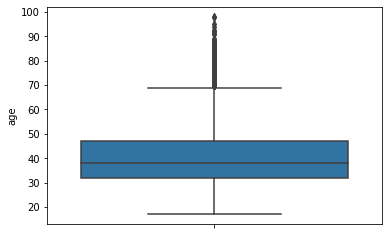

In [17]:
sns.boxplot(x = 'age', data = df_bank_marketing, orient = 'v')


# 2.1.2 Jobs

<AxesSubplot:xlabel='job', ylabel='count'>

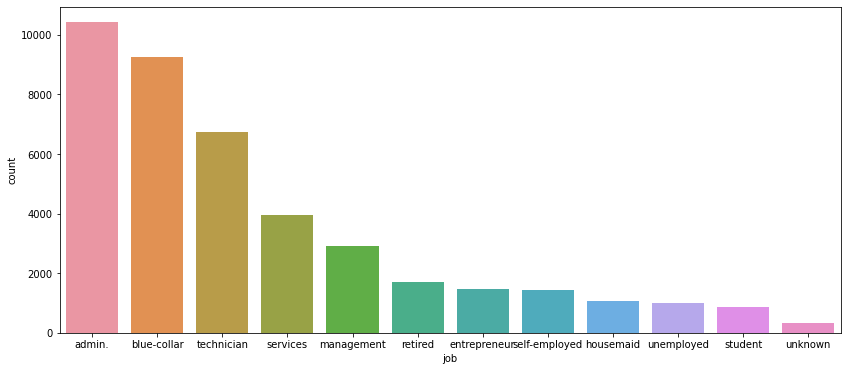

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x='job',data=df_bank_marketing,order=df_bank_marketing.job.value_counts().index)

More than 10000 people have administrative jobs, blue collar following it with around 9000 people. Students are constituted of  less than 2000 people 

### Age-Campaign relationship by Job Types

<AxesSubplot:xlabel='age', ylabel='campaign'>

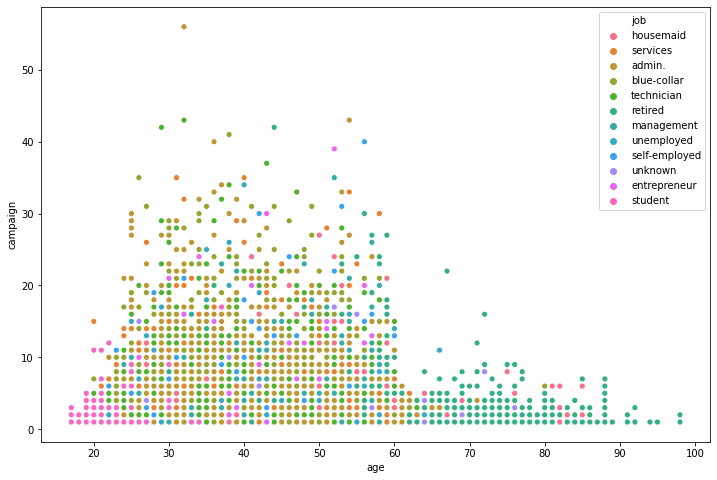

In [19]:

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_bank_marketing, x="age", y="campaign",hue="job",y_jitter=True,x_jitter=True)


# 2.2 Understanding Categorical Variables

In [20]:
categoric_variables

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


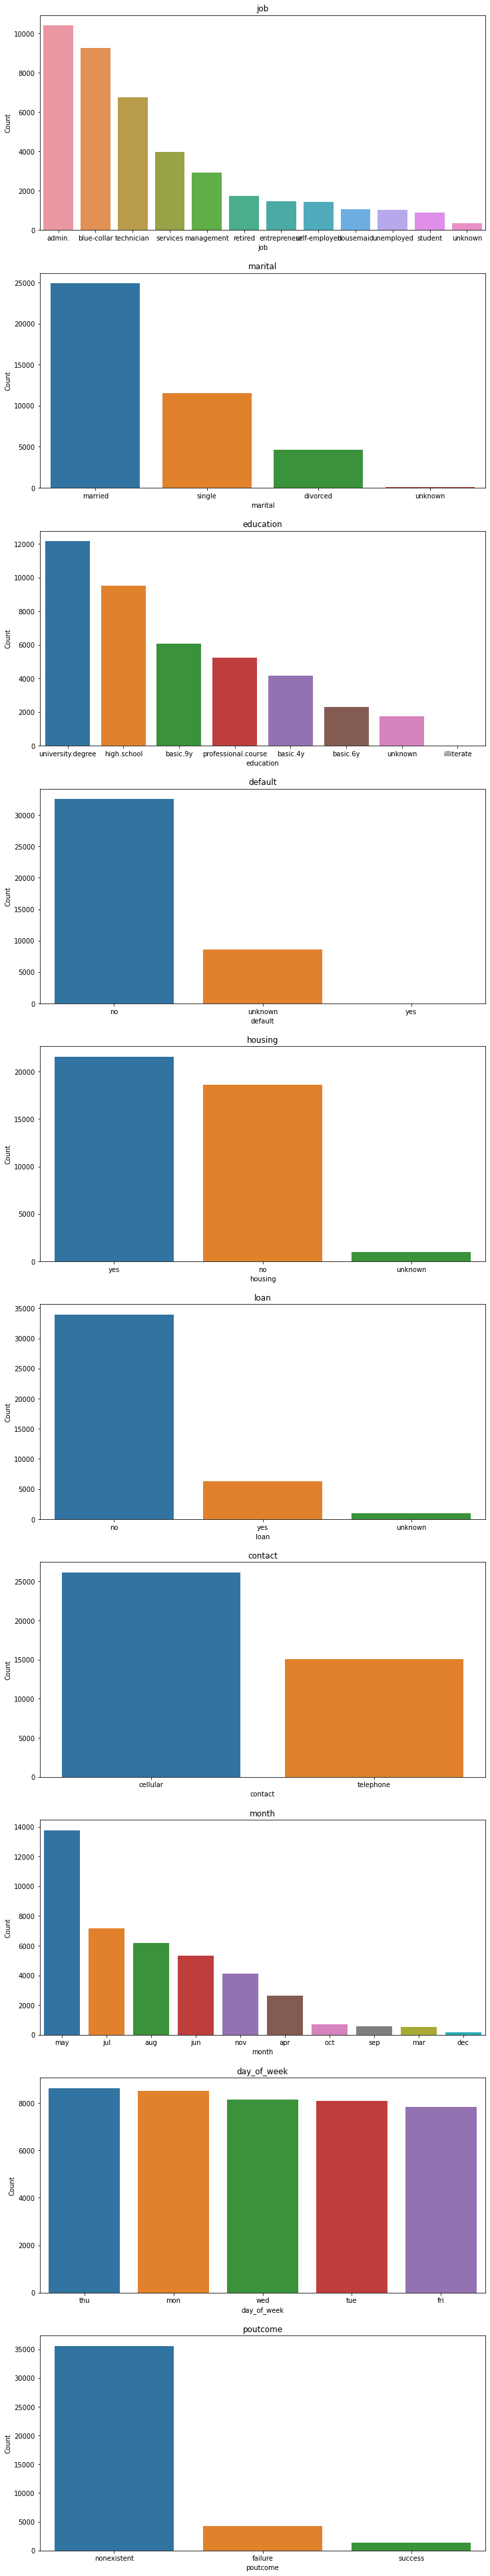

In [21]:
fig, a = plt.subplots(nrows = 10, ncols = 1, figsize = (12,70))
cols = categoric_variables.columns

i=0
for column in cols:
    sns.countplot(x = column, data = categoric_variables, ax = a[i],order=categoric_variables[column].value_counts().index)
    a[i].set_title(column)
    a[i].set_ylabel('Count')
    i=i+1


# 3. Missing Value Handling

In [22]:
print("Let's see again the missing value %:")
data_info

Let's see again the missing value %:


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
default,41188,8597,20.8726,object,"[no, nan, yes]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,1731,4.2027,object,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,990,2.4036,object,"[no, yes, nan]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,990,2.4036,object,"[no, yes, nan]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,41188,330,0.8012,object,"[housemaid, services, admin., blue-collar, tec...",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,80,0.1942,object,"[married, single, divorced, nan]",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,41188,0,0.0000,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78,40.0241,10.4212,17,32,38,47,98
poutcome,41188,0,0.0000,object,"[nonexistent, failure, success]",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nr.employed,41188,0,0.0000,float64,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076....",11,5167.04,72.2515,4963.6,5099.1,5191,5228.1,5228.1


From the information above, we can see that there are 6 missing values in our dataset. All of the missing values are categorical and all missing percentages are below %5 except the 'default' variable which is %20. In our case, we will use the imputation techniques based on the 'Missing value imputation cheetsheat'. You can refer to it below.

<img src="missingvaleimputation.png">

For the variables education,housing,loan,job and marital 'simple imputation' will be applied, for default variable 'convert to string NAN' method will be applied.

## 3.1. Simple Imputation 

In [23]:
df_bank_marketing2.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer

df_bank_marketing3=df_bank_marketing2.copy()

    

In [25]:
imp = SimpleImputer(strategy='most_frequent')
imp.fit(df_bank_marketing3[["education","housing","loan","job","marital"]])
df_bank_marketing3[["education","housing","loan","job","marital"]]=imp.transform(df_bank_marketing3[["education","housing","loan","job","marital"]])

In [26]:
df_bank_marketing3.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8597
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [27]:
df_bank_marketing3['default'].fillna('unknown', inplace =True) 


# 4. Dealing With Categorical Variables

In [28]:

print("For this part, what we should apply is most possibly affected by the ML algorithm we will use.")

For this part, what we should apply is most possibly affected by the ML algorithm we will use.


In [29]:
df_bank_marketing3[categoric_variables.columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df_bank_marketing3[categoric_variables.columns])
df_bank_marketing3[categoric_variables.columns]=enc.transform(df_bank_marketing3[categoric_variables.columns])
df_bank_marketing3
#One hot encoding

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,1.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,0.0,...,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,yes


# 5.Outlier Analysis 

In [31]:
df_bank_marketing3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,1.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,0.0,...,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
numeric_variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


age


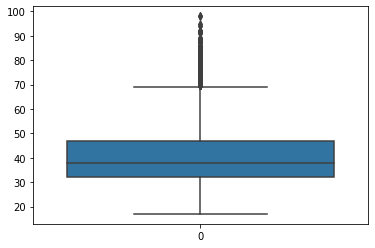

duration


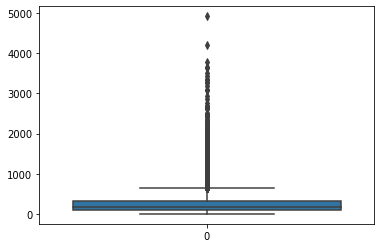

campaign


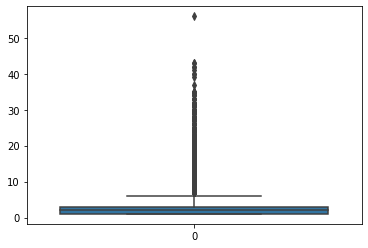

pdays


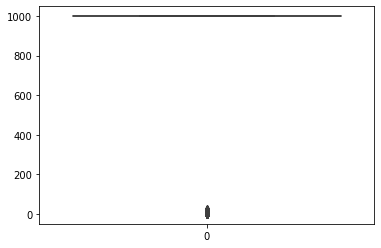

previous


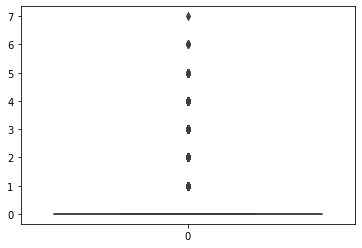

emp.var.rate


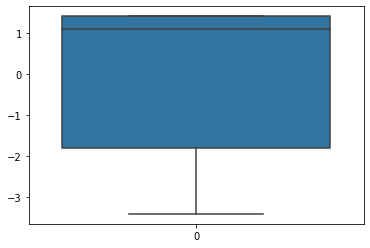

cons.price.idx


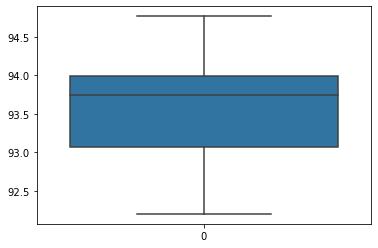

cons.conf.idx


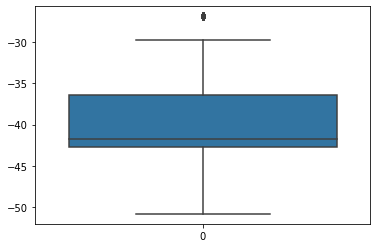

euribor3m


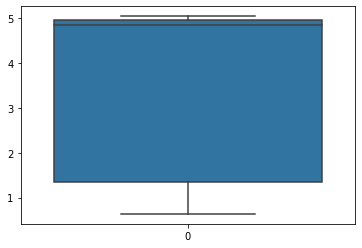

nr.employed


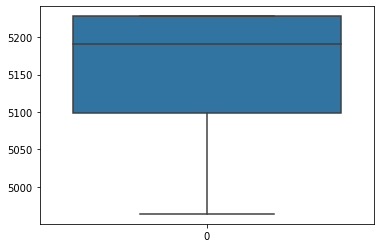

In [33]:

for col in numeric_variables.columns:
    print(col)
    sns.boxplot(data=numeric_variables[col])
    plt.show()

## 5.1. Hard Edge Reduction

In [34]:
df_bank_marketing4 = df_bank_marketing3.copy()

for col in numeric_variables.columns:
    print("max ",col,"before hard edge reduction:",max(df_bank_marketing4[col]))
    print("min ",col,"before hard edge reduction:",min(df_bank_marketing4[col]))

    lower_limit = df_bank_marketing4[col].quantile(q=0.01)
    upper_limit = df_bank_marketing4[col].quantile(q=0.99)
    df_bank_marketing4[col][df_bank_marketing4[col] > upper_limit] = upper_limit
    df_bank_marketing4[col][df_bank_marketing4[col] < lower_limit] = lower_limit
    
    print("max ",col,"after hard edge reduction:",max(df_bank_marketing4[col]))
    print("min ",col,"after hard edge reduction:",min(df_bank_marketing4[col]))


max  age before hard edge reduction: 98
min  age before hard edge reduction: 17
max  age after hard edge reduction: 71
min  age after hard edge reduction: 23
max  duration before hard edge reduction: 4918
min  duration before hard edge reduction: 0
max  duration after hard edge reduction: 1271.1299999999974
min  duration after hard edge reduction: 11.0
max  campaign before hard edge reduction: 56
min  campaign before hard edge reduction: 1
max  campaign after hard edge reduction: 14
min  campaign after hard edge reduction: 1
max  pdays before hard edge reduction: 999
min  pdays before hard edge reduction: 0
max  pdays after hard edge reduction: 999
min  pdays after hard edge reduction: 3
max  previous before hard edge reduction: 7
min  previous before hard edge reduction: 0
max  previous after hard edge reduction: 2
min  previous after hard edge reduction: 0
max  emp.var.rate before hard edge reduction: 1.4
min  emp.var.rate before hard edge reduction: -3.4
max  emp.var.rate after hard

C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ ==

 cons.conf.idx before hard edge reduction: -50.8
max  cons.conf.idx after hard edge reduction: -26.9
min  cons.conf.idx after hard edge reduction: -49.5
max  euribor3m before hard edge reduction: 5.045
min  euribor3m before hard edge reduction: 0.634
max  euribor3m after hard edge reduction: 4.968
min  euribor3m after hard edge reduction: 0.6584800000000001
max  nr.employed before hard edge reduction: 5228.1
min  nr.employed before hard edge reduction: 4963.6
max  nr.employed after hard edge reduction: 5228.1
min  nr.employed after hard edge reduction: 4963.6


C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alican\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ ==

## New Boxplots After Hard Edge Method

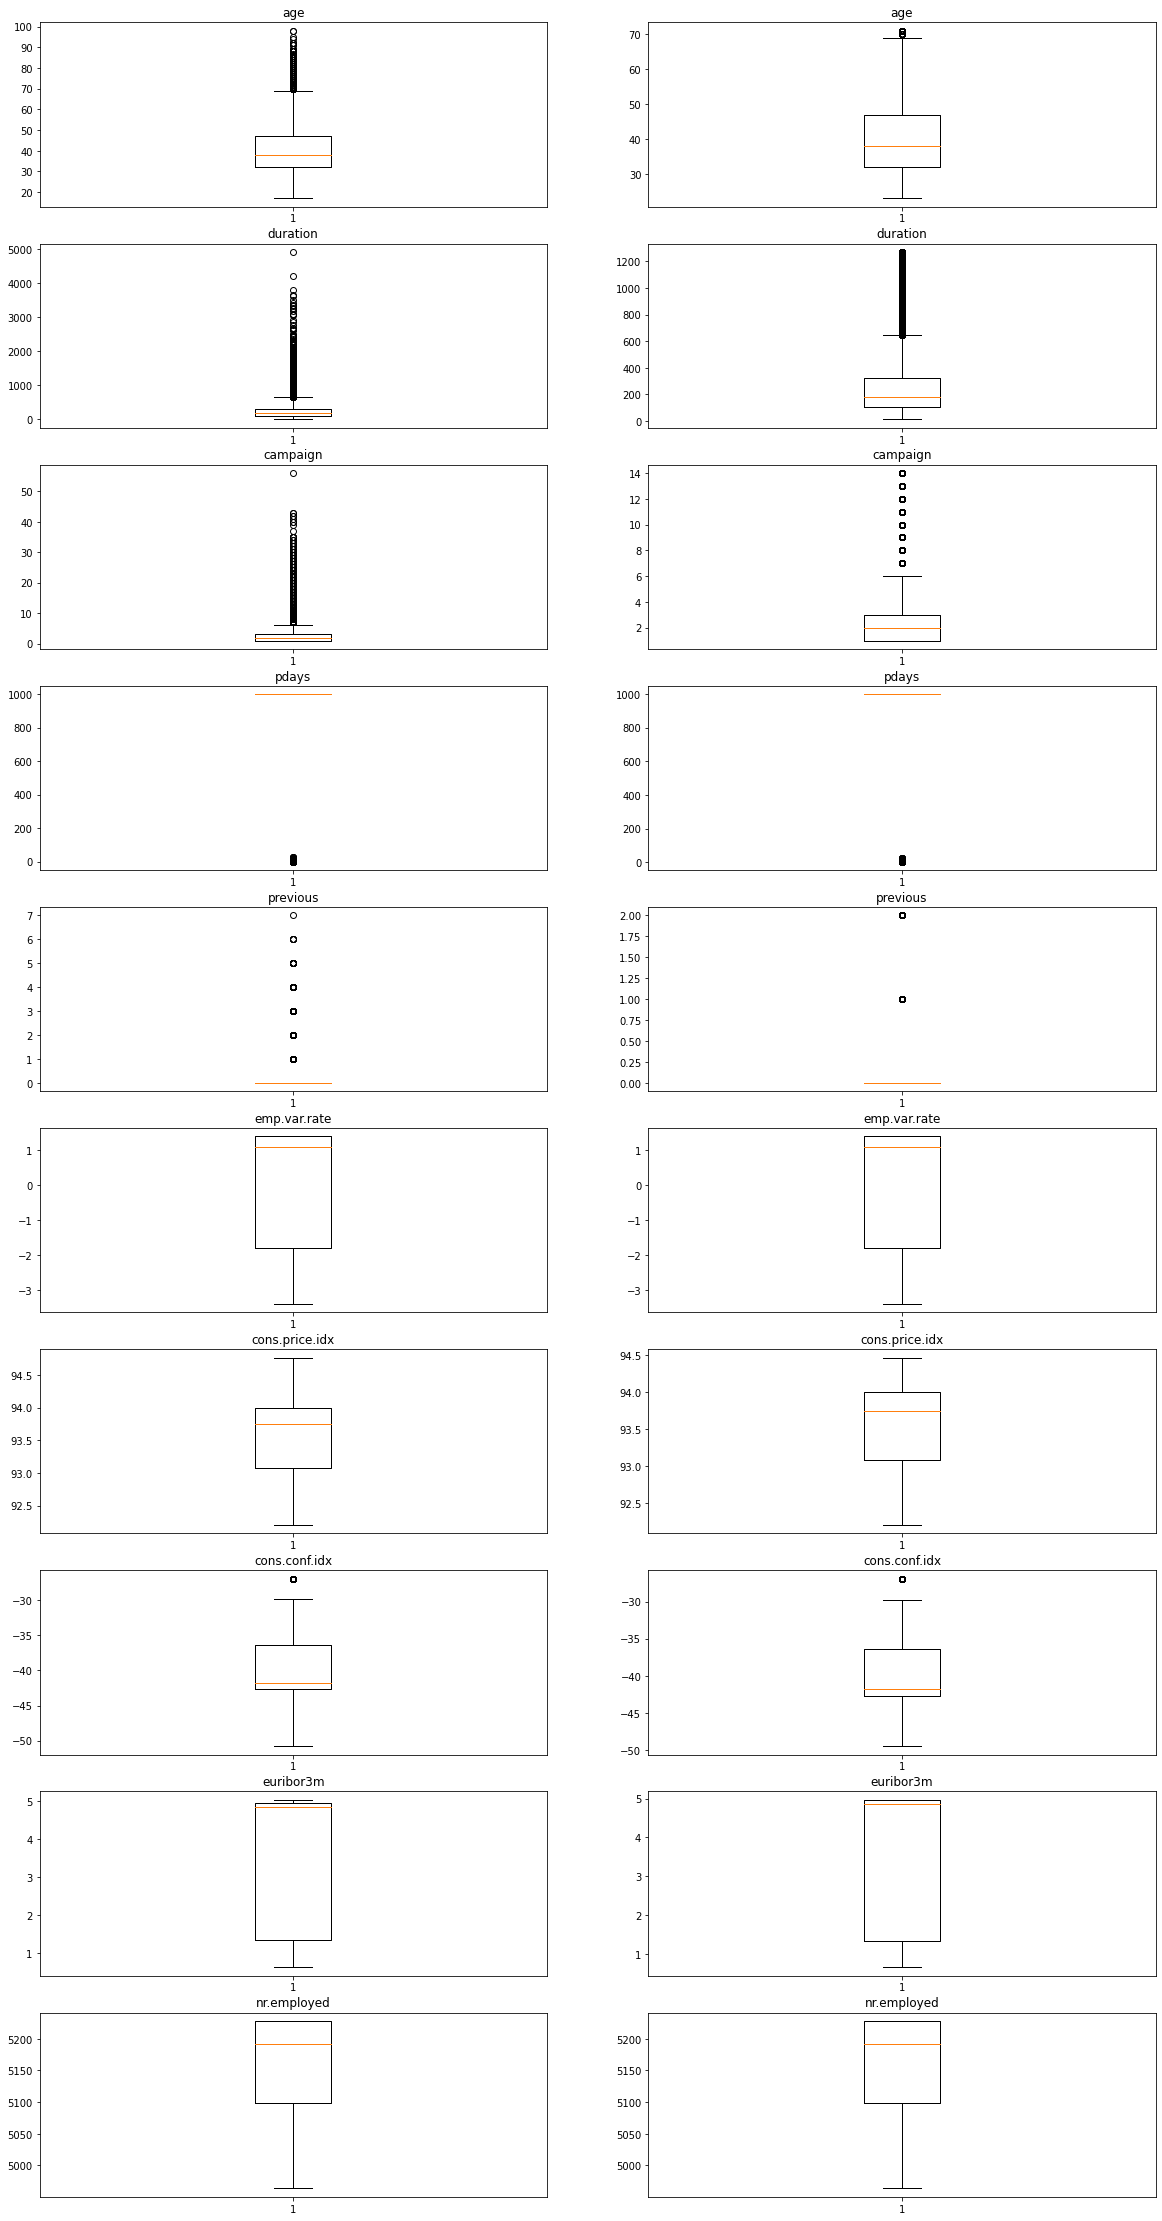

In [35]:
fig, axs = plt.subplots(10, 2,figsize=(20,40))
i=0                               
for col in numeric_variables.columns:
    axs[i,0].boxplot(x=numeric_variables[col])
    axs[i, 0].set_title(col)
    axs[i,1].boxplot(x=df_bank_marketing4[col])
    axs[i, 1].set_title(col)
    i=i+1


# 6. Binning 

To see if binning process is necessary, we  again use the MissingUniqueStatistics function:

In [36]:
MissingUniqueStatistics(df_bank_marketing4)

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0020006219546000164 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
age,41188,0,0.0,int64,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",49,39.9766,10.1383,23,32,38,47,71
campaign,41188,0,0.0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",14,2.50002,2.30119,1,1,2,3,14
nr.employed,41188,0,0.0,float64,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076....",11,5167.04,72.2515,4963.6,5099.1,5191,5228.1,5228.1
euribor3m,41188,0,0.0,float64,"[4.857, 4.856, 4.855, 4.859, 4.86, 4.858000000...",295,3.62139,1.73419,0.65848,1.344,4.857,4.961,4.968
cons.conf.idx,41188,0,0.0,float64,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...",24,-40.4951,4.6129,-49.5,-42.7,-41.8,-36.4,-26.9
cons.price.idx,41188,0,0.0,float64,"[93.994, 94.465, 93.91799999999999, 93.444, 93...",24,93.5741,0.57603,92.201,93.075,93.749,93.994,94.465
emp.var.rate,41188,0,0.0,float64,"[1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0,...",10,0.0818855,1.57096,-3.4,-1.8,1.1,1.4,1.4
poutcome,41188,0,0.0,float64,"[1.0, 0.0, 2.0]",3,0.930101,0.362886,0,1,1,1,2
previous,41188,0,0.0,int64,"[0, 1, 2]",3,0.162402,0.433241,0,0,0,0,2


Here, we observe that age, euribor3m and duration have significantly high unique values. Duration and age have high range. So, for better results, we can use binning procedure to them:

### 6.1 Understanding Duration-Target Relation

In [37]:
df_bank_marketing4[["duration","y"]]

,duration,y
0,261.0,no
1,149.0,no
2,226.0,no
3,151.0,no
4,307.0,no
...,...,...
41183,334.0,yes
41184,383.0,no
41185,189.0,no
41186,442.0,yes


<AxesSubplot:xlabel='duration', ylabel='age'>

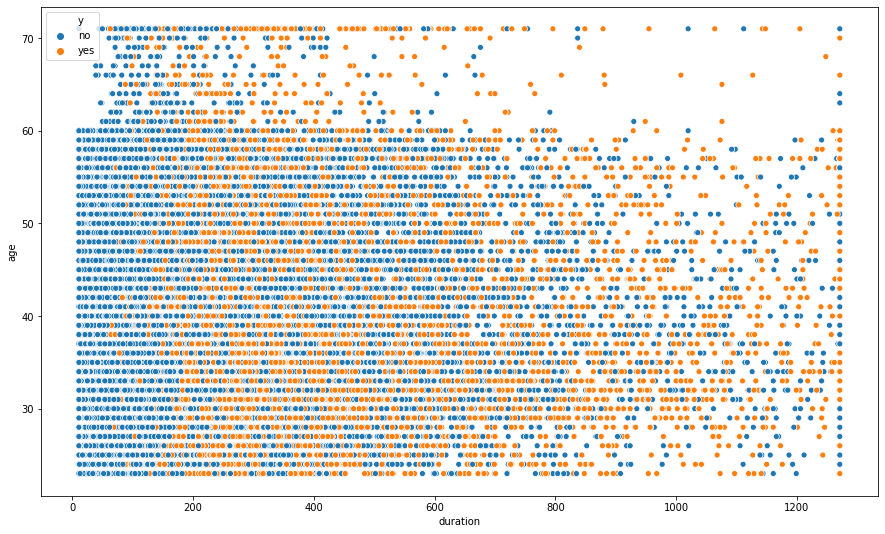

In [38]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=df_bank_marketing4[["age","duration","y"]],x='duration',y='age',hue='y')

<AxesSubplot:xlabel='y', ylabel='duration'>

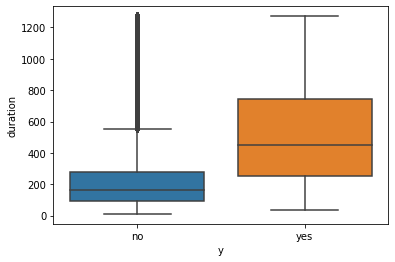

In [39]:
sns.boxplot(data=df_bank_marketing4[["duration","y"]], x='y', y='duration') #scatter yapılabilir. (duration-X hue=y)

From the boxplots above, we can observe that long durations( last contact duration) tend to results with "yes" while the result is no as for short durations.

In [40]:
df_bank_marketing3[df_bank_marketing3["duration"]==0].y

6251     no
23031    no
28063    no
33015    no
Name: y, dtype: object

Here, we can see that when duration of call is 0, obviously our target value will be no. But, with the hard-edge reduction method we eliminated these cases,hence our model will be more correct.

In [41]:
series_duration, bins = pd.qcut(df_bank_marketing4.duration, q=4, retbins=True, labels=[0,1,2,3])
series_duration.value_counts()

1    10392
0    10313
3    10286
2    10197
Name: duration, dtype: int64

In [42]:
df_bank_marketing4.duration.groupby(series_duration).mean()

duration
0     62.744109
1    139.645112
2    239.964695
3    576.725895
Name: duration, dtype: float64

In [43]:
series_age, bins2 = pd.qcut(df_bank_marketing4.age, q=4, retbins=True, labels=[0,1,2,3])
series_age.value_counts()

0    11176
2    10140
1     9999
3     9873
Name: age, dtype: int64

In [44]:
df_bank_marketing4.age.groupby(series_age).mean()

age
0    28.822119
1    35.354035
2    42.714990
3    54.472501
Name: age, dtype: float64

In [45]:
df_bank_marketing4.age=series_age
df_bank_marketing4.duration=series_duration


In [46]:
df_bank_marketing4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,5.0,1.0,5.0,0.0,1.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.465,-49.5,1.028,4963.6,yes
41184,2,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.465,-49.5,1.028,4963.6,no
41185,3,5.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,0.0,...,2,999,0,1.0,-1.1,94.465,-49.5,1.028,4963.6,no
41186,2,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.465,-49.5,1.028,4963.6,yes


# 7. Class Imbalance

Below, we can observe that total number of no results are much higher than of yes results which may lead to inefficiency in some of the algorithms that is used. So we need to ease the problem as much as we can by implementing some methods. (over/undersampling, SMOTE algorithm, balanced class weight etc.)

<AxesSubplot:>

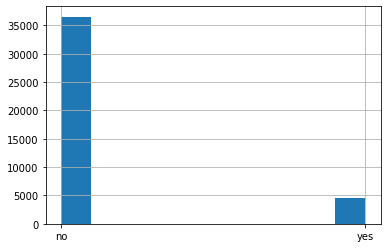

In [47]:
df_bank_marketing4.y.hist()

In [48]:
df_bank_marketing4.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

First let's encode the target with the help of `LabelEncoder`.

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_bank_marketing4.y)
df_bank_marketing4.y=le.transform(df_bank_marketing4.y)
#df_bank_marketing4

# 8. Train-Test Split

In [50]:
df_bank_marketing4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0


In [51]:
df_bank_marketing4["age"] = df_bank_marketing4['age'].astype('float')
df_bank_marketing4["duration"] = df_bank_marketing4['duration'].astype('float')

In [52]:
X=df_bank_marketing4.iloc[:,0:20]
y=df_bank_marketing4.iloc[:,-1:]

In [53]:
X.shape, y.shape

((41188, 20), (41188, 1))

In [54]:
from sklearn.model_selection import train_test_split

For easier implementation of split process , we define new function:

In [55]:
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [56]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

In [57]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_size, val_size, test_size)

In [58]:
X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0], \
y_train.shape[0]/y.shape[0], y_val.shape[0]/y.shape[0], y_test.shape[0]/y.shape[0]

(0.5999805768670486,
 0.20000971156647568,
 0.20000971156647568,
 0.5999805768670486,
 0.20000971156647568,
 0.20000971156647568)

In [59]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((24712, 20), (8238, 20), (8238, 20), (24712, 1), (8238, 1), (8238, 1))

In [60]:
train = pd.concat([X_train, y_train],axis=1)
val = pd.concat([X_val, y_val],axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [61]:
train.to_csv("trainfinal.csv", index=True, header=True)
val.to_csv("valfinal.csv", index=True, header=True)
test.to_csv("testfinal.csv", index=True, header=True)

In [62]:
train.y.value_counts(True)

0    0.888758
1    0.111242
Name: y, dtype: float64

In [63]:
val.y.value_counts(True)

0    0.885166
1    0.114834
Name: y, dtype: float64

In [64]:
test.y.value_counts(True)

0    0.885288
1    0.114712
Name: y, dtype: float64

# 9. StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
std = StandardScaler()
X_train_scaled = pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns, index=X_train.index)


In [67]:
X_val_scaled = pd.DataFrame(std.transform(X_val),columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(std.transform(X_test),columns=X_test.columns, index=X_test.index)

In [68]:
X_train_scaled
X_val_scaled
X_test_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
30386,-1.287852,-0.738033,-0.280655,0.618128,1.945382,-1.098555,-0.419764,-0.754530,-1.822863,-0.003884,-0.440884,-0.218269,0.193512,-0.371756,0.191832,-1.202470,-0.864286,-1.430218,-1.306393,-0.949962
5501,-0.399222,-0.738033,-0.280655,1.099130,-0.513535,0.910287,-0.419764,1.325329,0.764361,-0.720171,0.454434,-0.650191,0.193512,-0.371756,0.191832,0.646020,0.732177,0.892616,0.710878,0.326934
13919,-0.399222,-0.456977,-0.280655,-0.824878,-0.513535,0.910287,-0.419764,-0.754530,-0.529251,-1.436458,0.454434,-0.218269,0.193512,-0.371756,0.191832,0.837244,0.600152,-0.475034,0.772113,0.842416
7873,0.489408,-0.738033,-0.280655,0.618128,-0.513535,-1.098555,-0.419764,1.325329,-0.098047,-0.720171,0.454434,-0.650191,0.193512,-0.371756,0.191832,0.837244,1.550386,-0.279655,0.715500,0.842416
29196,-0.399222,-0.738033,-0.280655,-0.824878,-0.513535,-1.098555,-0.419764,-0.754530,-1.822863,-1.436458,1.349752,-0.650191,0.193512,-0.371756,0.191832,-1.202470,-0.864286,-1.430218,-1.283286,-0.949962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39972,-0.399222,1.791470,1.372634,1.099130,-0.513535,-1.098555,-0.419764,-0.754530,-0.098047,0.712403,1.349752,-0.650191,0.193512,-0.371756,0.191832,-1.138729,0.838145,0.154519,-1.655314,-2.443609
6801,-0.399222,-1.019089,-1.933944,1.099130,-0.513535,-1.098555,-0.419764,1.325329,0.764361,1.428690,1.349752,-0.218269,0.193512,-0.371756,0.191832,0.646020,0.732177,0.892616,0.710878,0.326934
9778,0.489408,1.791470,-0.280655,-0.824878,1.945382,0.910287,-0.419764,1.325329,-0.098047,-0.720171,-1.336201,0.213654,0.193512,-0.371756,0.191832,0.837244,1.550386,-0.279655,0.770957,0.842416
24472,-0.399222,-0.738033,-0.280655,-1.786882,-0.513535,0.910287,-0.419764,-0.754530,1.195565,-0.720171,-0.440884,-0.218269,0.193512,-0.371756,0.191832,-0.118872,-0.647139,-0.323073,0.326141,0.393627


In [69]:
y_val=val.y.values
y_train=train.y.values
y_test=test.y.values

In [70]:
y_train
y_test
y_val

array([0, 1, 0, ..., 1, 0, 0])

# 10. Model Fitting 

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve, plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [72]:
dt = DecisionTreeClassifier(min_samples_leaf=0.1, criterion="gini", max_depth=5, random_state=24,class_weight="balanced")
rf = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight="balanced",random_state=24)
knn= KNeighborsClassifier(n_neighbors=5,weights='distance')
svm= SVC(C=1.0, class_weight="balanced", probability=True,random_state=24)
log_reg = LogisticRegression(class_weight="balanced",max_iter=5000)
xgb = XGBClassifier(n_estimators=100, random_state=24, n_jobs=2,scale_pos_weight=(89/11)) # sum(negative instances) / sum(positive instances)


#balanced : n_samples / (n_classes * np.bincount(y))

--------DecisionTreeClassifier--------
The accuracy of model DecisionTreeClassifier is 0.75
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      7292
           1       0.30      0.87      0.45       946

    accuracy                           0.75      8238
   macro avg       0.64      0.80      0.64      8238
weighted avg       0.90      0.75      0.79      8238





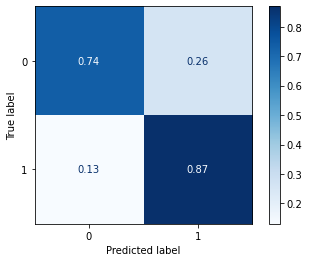

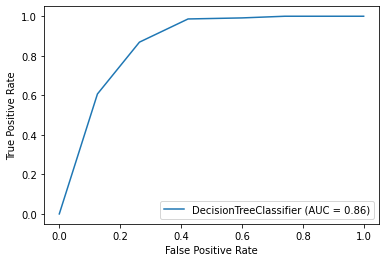

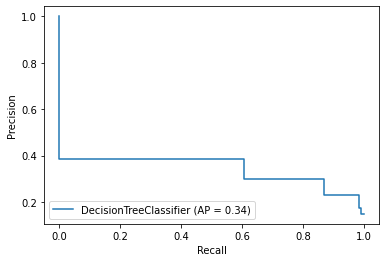

--------RandomForestClassifier--------
The accuracy of model RandomForestClassifier is 0.84
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7292
           1       0.39      0.69      0.50       946

    accuracy                           0.84      8238
   macro avg       0.67      0.78      0.70      8238
weighted avg       0.89      0.84      0.86      8238





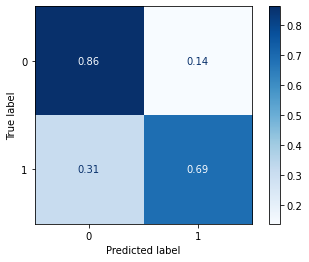

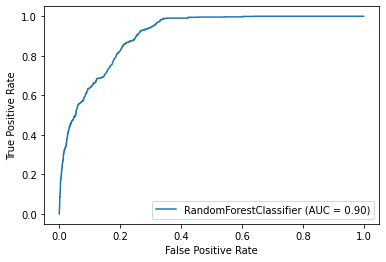

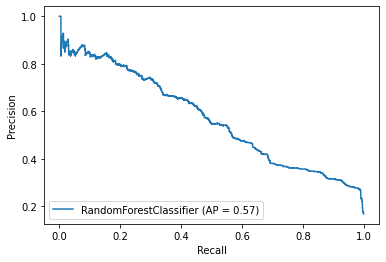

--------KNeighborsClassifier--------
The accuracy of model KNeighborsClassifier is 0.89
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7292
           1       0.56      0.38      0.45       946

    accuracy                           0.89      8238
   macro avg       0.74      0.67      0.70      8238
weighted avg       0.88      0.89      0.89      8238





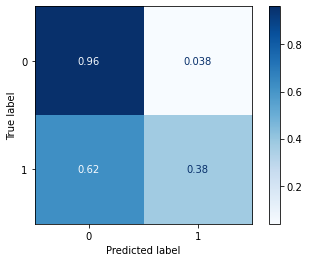

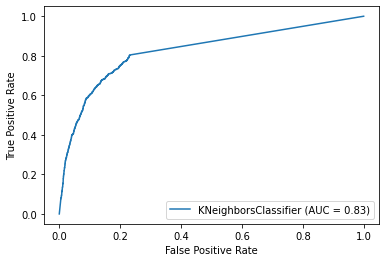

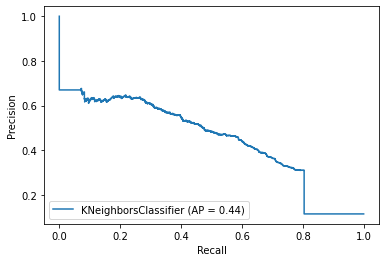

--------SVC--------
The accuracy of model SVC is 0.72
              precision    recall  f1-score   support

           0       0.95      0.71      0.82      7292
           1       0.25      0.73      0.37       946

    accuracy                           0.72      8238
   macro avg       0.60      0.72      0.59      8238
weighted avg       0.87      0.72      0.76      8238





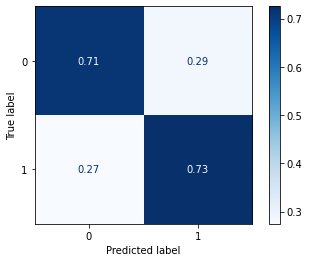

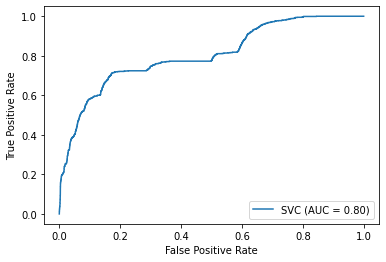

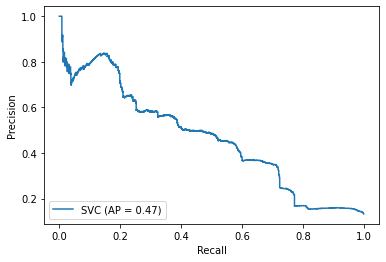

--------LogisticRegression--------
The accuracy of model LogisticRegression is 0.79
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7292
           1       0.34      0.87      0.49       946

    accuracy                           0.79      8238
   macro avg       0.66      0.82      0.68      8238
weighted avg       0.91      0.79      0.82      8238





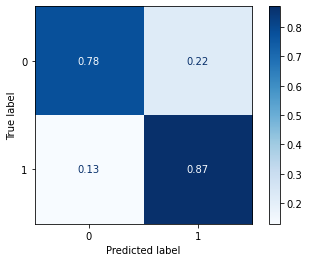

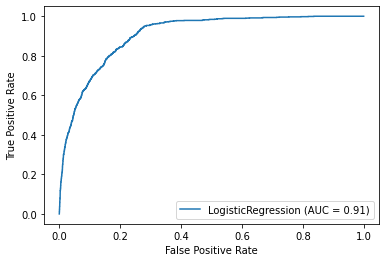

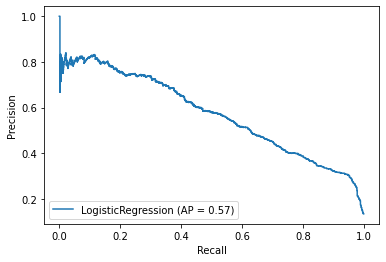

--------XGBClassifier--------
The accuracy of model XGBClassifier is 0.84
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7292
           1       0.40      0.80      0.53       946

    accuracy                           0.84      8238
   macro avg       0.68      0.82      0.72      8238
weighted avg       0.90      0.84      0.86      8238





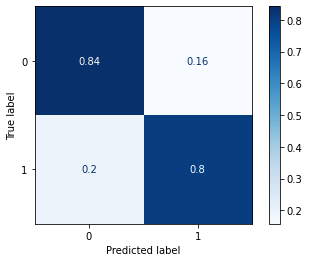

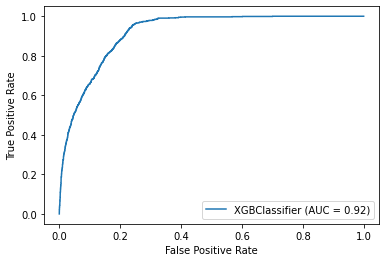

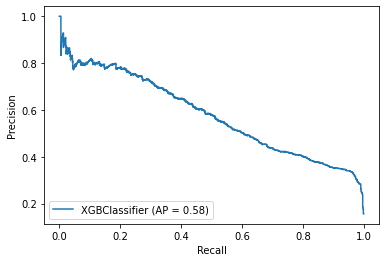

In [73]:
models= [dt, rf, knn, svm, log_reg, xgb]
performance_results = pd.DataFrame(columns=["Model_name","Accuracy","Precision","Recall", "Fscore","ROC_AUC"])
for model in models:
    model_name = type(model).__name__
    print(f"--------{model_name}--------")
    model.fit(X_train, y_train) 
    y_pred= model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)
    accuracy= accuracy_score(y_val, y_pred) 
    clf_report= classification_report(y_val, y_pred)
    precision, recall, fscore,_ = precision_recall_fscore_support(y_val, y_pred, average='binary')
    roc_auc = roc_auc_score(y_val, y_pred_proba[:,1])
    performance_results = performance_results.append({"Model_name":model_name,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"Fscore":fscore,"ROC_AUC":roc_auc},ignore_index=True)
    print(f"The accuracy of model {model_name} is {accuracy:.2f}")
    print(clf_report)
    print("\n")
    
    plot_confusion_matrix(model, X_val, y_val,
                                 display_labels=["0","1"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
    
    plot_roc_curve(model, X_val, y_val)
    plot_precision_recall_curve(model, X_val,y_val)
    plt.show()

In [74]:
performance_results

,Model_name,Accuracy,Precision,Recall,Fscore,ROC_AUC
0,DecisionTreeClassifier,0.751882,0.299781,0.868922,0.445770,0.862388
1,RandomForestClassifier,0.842316,0.393482,0.689218,0.500960,0.904896
2,KNeighborsClassifier,0.894392,0.559937,0.375264,0.449367,0.825261
3,SVC,0.715344,0.247564,0.725159,0.369115,0.804413
4,LogisticRegression,0.789026,0.337572,0.869979,0.486407,0.907319
5,XGBClassifier,0.838067,0.398323,0.803383,0.532586,0.917773


Based on the accuracy results, we have two candidates: RandomForestClassifier and LogisticRegression. 

# 11. Cross Validation

In [75]:
from sklearn.model_selection import KFold, cross_val_score

In [76]:
#Logistic Regression

In [77]:
kf = KFold(n_splits=5)

X_dataset = X_train
Y_dataset = y_train

accs = []
for train_index, test_index in kf.split(X_dataset):
    train_folds_x, test_fold_x = X_dataset.iloc[train_index], X_dataset.iloc[test_index]
    train_folds_y, test_fold_y = Y_dataset[train_index], Y_dataset[test_index]
    print(train_folds_x.shape[0], test_fold_x.shape[0])
    
    model = LogisticRegression(class_weight="balanced", max_iter=10000).fit(train_folds_x, train_folds_y)
    test_fold_y_prime = model.predict(test_fold_x)
    
    accs.append(accuracy_score(test_fold_y, test_fold_y_prime))

print(np.array(accs).mean(), np.array(accs).std())

19769 4943
19769 4943
19770 4942
19770 4942
19770 4942
0.7810772306520148 0.014535223732042628


In [78]:
accs = cross_val_score(LogisticRegression(class_weight="balanced", max_iter=10000), X_train, y_train)
print(accs.mean(), accs.std())

0.7810774517070483 0.013954419419601367


In [79]:
# I expect them to have similar performances.
model = LogisticRegression(class_weight="balanced", max_iter=10000).fit(X_train, y_train)

print(accuracy_score(y_test, model.predict(X_test)))
print(accuracy_score(y_val, model.predict(X_val)))

0.7787084243748482
0.7890264627336733


## Random Forest

In [80]:
kf = KFold(n_splits=5)

X_dataset = X_train
Y_dataset = y_train

accs = []
for train_index, test_index in kf.split(X_dataset):
    train_folds_x, test_fold_x = X_dataset.iloc[train_index], X_dataset.iloc[test_index]
    train_folds_y, test_fold_y = Y_dataset[train_index], Y_dataset[test_index]
    print(train_folds_x.shape[0], test_fold_x.shape[0])
    
    model = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight="balanced",random_state=24).fit(train_folds_x, train_folds_y)
    test_fold_y_prime = model.predict(test_fold_x)
    
    accs.append(accuracy_score(test_fold_y, test_fold_y_prime))

print(np.array(accs).mean(), np.array(accs).std())

19769 4943
19769 4943
19770 4942
19770 4942
19770 4942
0.838661264518301 0.008930509349866795


In [81]:
accs = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=3, class_weight="balanced",random_state=24),X_train,y_train)
print(accs.mean(), accs.std())

0.8380138270742148 0.008143390322975981


# 12. HyperParameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
model = RandomForestClassifier(n_jobs=-1, class_weight="balanced")
params = {
    "n_estimators":[10,30,50],
    "max_depth":[1,2,3,4],
    "min_samples_split":[5,10,15]
}

In [84]:
gcv = GridSearchCV(model, params, verbose=1, cv=3, scoring="roc_auc")
gcv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   29.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              r

In [85]:
gcv.best_params_

{'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 50}

In [86]:
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [87]:
print( classification_report(y_test, gcv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7293
           1       0.33      0.89      0.48       945

    accuracy                           0.78      8238
   macro avg       0.65      0.83      0.67      8238
weighted avg       0.91      0.78      0.82      8238



# 13. Test Performance

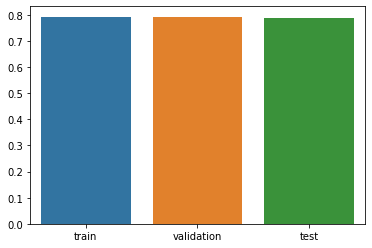

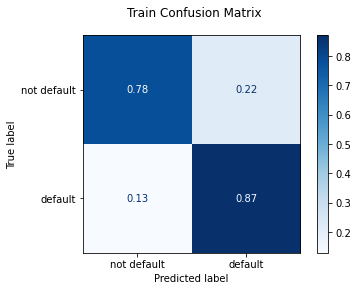

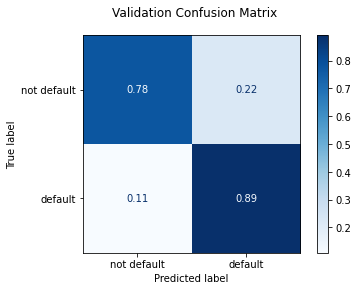

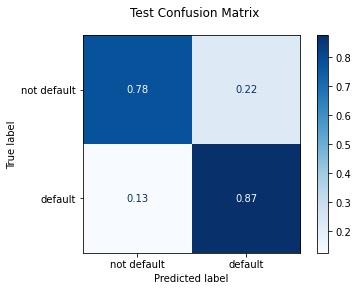

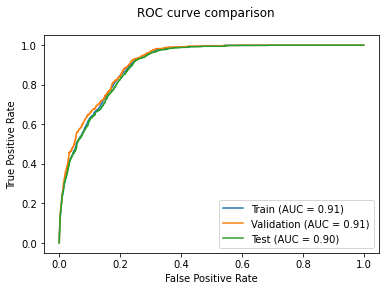

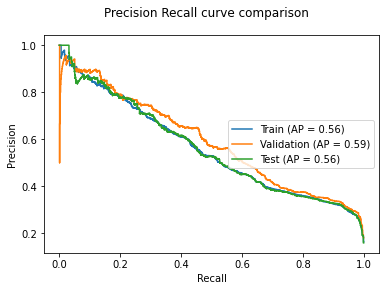

In [88]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
model.fit(X_train, y_train) 

y_pred_tr= model.predict(X_train)
y_pred_proba_tr = model.predict_proba(X_train)

y_pred_val= model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)

y_pred_te= model.predict(X_test)
y_pred_proba_te = model.predict_proba(X_test)

tr_accuracy= accuracy_score(y_train, y_pred_tr)
val_accuracy= accuracy_score(y_val, y_pred_val)
te_accuracy= accuracy_score(y_test, y_pred_te)
acc = {"train":tr_accuracy,"validation":val_accuracy,"test":te_accuracy}
sns.barplot(x=list(acc.keys()),y=list(acc.values()))

tr_conf = plot_confusion_matrix(model, X_train, y_train,
                             display_labels=["not default","default"],
                             cmap=plt.cm.Blues,
                             normalize="true")
tr_conf.figure_.suptitle("Train Confusion Matrix")

val_conf =plot_confusion_matrix(model, X_val, y_val,
                             display_labels=["not default","default"],
                             cmap=plt.cm.Blues,
                             normalize="true")
val_conf.figure_.suptitle("Validation Confusion Matrix")

te_conf = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=["not default","default"],
                             cmap=plt.cm.Blues,
                             normalize="true")
te_conf.figure_.suptitle("Test Confusion Matrix")

tr_roc_disp = plot_roc_curve(model, X_train, y_train,name="Train")
val_roc_disp = plot_roc_curve(model, X_val, y_val, ax=tr_roc_disp.ax_ ,name="Validation")
te_roc_disp = plot_roc_curve(model, X_test, y_test, ax=val_roc_disp.ax_,name="Test")
te_roc_disp.figure_.suptitle("ROC curve comparison")


fig,ax=plt.subplots()
tr_pre_rec_disp = plot_precision_recall_curve(model, X_train, y_train,name="Train",ax=ax)
val_pre_rec_disp = plot_precision_recall_curve(model, X_val, y_val, ax=tr_pre_rec_disp.ax_,name="Validation")
te_pre_rec_disp = plot_precision_recall_curve(model, X_test, y_test, ax=val_pre_rec_disp.ax_,name="Test")
te_pre_rec_disp.figure_.suptitle("Precision Recall curve comparison")
ax.legend(loc="right")

plt.show()


## Resources

[Data Source](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

[https://towardsdatascience.com/complete-guide-to-data-visualization-with-python](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e)

[https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall](https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall)

